<a href="https://colab.research.google.com/github/ksusmita223/FraudDetection/blob/main/CreditCardFrauddetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the dependencies

In [564]:
# importing the libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

Importing dataset

In [565]:
# loading the dataset to a Pandas DataFrame
credit_card_data = pd.read_csv('/content/creditcard.csv')

In [566]:
# displaying dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [567]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [568]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [569]:
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [570]:
credit_card_data = credit_card_data.drop(credit_card_data.index[-1])

In [571]:
credit_card_data.isnull().sum()


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [572]:
# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

0    284314
1       492
Name: Class, dtype: int64

In [573]:
# separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [574]:
print(legit.shape)

(284314, 31)


In [575]:
print(fraud.shape)

(492, 31)


In [576]:
# compare of amount column in both legit and fraud
legit.Amount.describe()

count    284314.000000
mean         88.290570
std         250.105416
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [577]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [578]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94837.928076,0.008260,-0.006270,0.012168,-0.007858,0.005453,0.002421,0.009631,-0.000986,0.004465,...,-0.000646,-0.001236,-0.000027,0.000068,0.000182,-0.000070,-0.000086,-0.000295,-0.000131,88.290570
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [579]:
legit = legit.sample(n=492)


In [580]:
print(legit.shape)

(492, 31)


In [581]:
new_dataset = pd.concat([legit, fraud], axis=0)

In [582]:
print(new_dataset.shape)

(984, 31)


In [583]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
19855,30603.0,1.168741,-0.163844,0.587047,0.858730,-0.602972,-0.140183,-0.322285,0.124234,0.839479,...,-0.094019,-0.069152,-0.027050,0.106601,0.429734,0.444467,-0.007075,0.006777,11.50,0
203903,135023.0,1.879872,1.204888,-1.637091,4.176560,1.004166,-0.764106,0.542847,-0.226513,-1.198501,...,-0.411571,-1.148080,0.283566,-0.322397,-0.227808,-0.343697,-0.001379,0.021460,20.05,0
120736,75942.0,-0.151720,-1.780334,-0.526932,1.825657,-0.749866,-0.509799,1.249675,-0.359110,-0.344096,...,0.441183,-0.217459,-0.635160,0.437477,0.359526,-0.407138,-0.110196,0.137832,696.60,0
65325,51531.0,1.101670,-0.021994,1.184283,1.289361,-0.967514,-0.423474,-0.474540,0.031702,0.488251,...,0.125218,0.304551,-0.037915,0.383907,0.320509,-0.365186,0.054008,0.047114,45.00,0
114665,73572.0,-1.404247,1.420117,1.771384,-0.854882,0.528508,-1.033213,1.597411,-0.520253,0.384082,...,-0.142157,0.024181,-0.498971,0.341438,0.903951,-0.610737,0.003099,-0.216857,18.48,0


In [584]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [585]:
new_dataset['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [586]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,95856.286585,0.083573,0.121048,0.012816,0.141273,-0.041067,-0.017238,-0.014140,0.033868,0.069480,...,-0.020736,-0.031875,0.000351,-0.001660,0.012078,-0.011198,-0.019200,-0.009621,-0.023202,73.076057
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [587]:
#splitting by instances and class
X = credit_card_data.drop(columns='Class', axis=1)
Y = credit_card_data['Class']

In [588]:
print(X)

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284801  172785.0   0.120316   0.931005 -0.546012 -0.745097  1.130314   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   

              V6        V7        V8        V9  ...       V20       V21  \
0       0.462388  0.239599  0.098698  0.363787  ...  0.25141

In [589]:
print(Y)

0         0
1         0
2         0
3         0
4         0
         ..
284801    0
284802    0
284803    0
284804    0
284805    0
Name: Class, Length: 284806, dtype: int64


In [590]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

In [591]:
print(X_train)

            Time        V1        V2        V3        V4        V5        V6  \
265517  161918.0  2.067450 -1.738654 -1.178485 -1.559890 -1.247282 -0.495221   
141151   84151.0  1.106176  0.148096  0.424489  1.282916 -0.080275  0.146526   
42664    41191.0 -0.991920  0.603193  0.711976 -0.992425 -0.825838  1.956261   
46274    42712.0 -0.701843  1.217797  0.806660  0.676619 -0.216539 -0.151587   
82325    59359.0 -0.448747 -1.011440  0.115903 -3.454854  0.715771 -0.147490   
...          ...       ...       ...       ...       ...       ...       ...   
226362  144598.0  1.852229 -0.447149 -0.528595  0.278810 -0.354566 -0.131237   
85418    60764.0 -1.497933  0.657921  1.581568 -0.024286  0.584698  1.303031   
29062    35301.0  1.069777  0.072105  0.496540  1.505318 -0.380277 -0.370243   
169626  119784.0  2.132623 -1.083087 -0.270003 -0.896118 -1.428145 -0.623771   
17677    28847.0 -0.598120  0.775041  1.823394  0.312991 -0.096171 -0.391452   

              V7        V8        V9  .

In [592]:
print(X_test)

            Time        V1        V2        V3        V4        V5        V6  \
263019  160760.0 -1.840789 -0.819185  0.847215 -1.081170  2.915156 -0.987729   
11378    19847.0 -2.829816 -2.765149  2.537793 -1.074580  2.842559 -2.153536   
147283   88326.0 -3.576495  2.318422  1.306985  3.263665  1.127818  2.865246   
219439  141734.0  2.060386 -0.015382 -1.082544  0.386019 -0.024331 -1.074935   
36939    38741.0  1.209965  1.384303 -1.343531  1.763636  0.662351 -2.113384   
...          ...       ...       ...       ...       ...       ...       ...   
54199    46329.0 -0.863057  0.225429  2.458855  0.613099  0.067149  1.716173   
184616  126310.0  1.397799 -1.426153 -0.369131  0.891825 -1.164153 -0.166657   
274531  166069.0 -0.157884  1.252000 -1.564569  1.038123 -0.358998 -0.388834   
269818  163789.0 -0.554484 -0.083299  2.484448  1.094489 -0.347074  1.154296   
64170    51060.0  1.228059 -0.603264  0.246723 -0.414322 -1.170914 -0.895176   

              V7        V8        V9  .

In [593]:
print(X.shape, X_train.shape, X_test.shape)

(284806, 30) (227844, 30) (56962, 30)


In [594]:
model = make_pipeline(StandardScaler(), LogisticRegression())

In [595]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [596]:
model.score(X_test, Y_test)

0.9991573329588147

In [597]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [598]:
print(X_train_prediction)

[0 0 0 ... 0 0 0]


In [599]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9992407085549763


In [600]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [601]:
test_data_precision = precision_score(X_test_prediction, Y_test)

In [602]:
test_data_recall = recall_score(X_test_prediction, Y_test)
print('Recall score:', test_data_recall)

Recall score: 0.8205128205128205


In [603]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9991573329588147


In [604]:
print('Precision score on test data : ', test_data_precision )

Precision score on test data :  0.6530612244897959


In [605]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



In [606]:
c_matrix = metrics.confusion_matrix(X_test_prediction, Y_test)
print(c_matrix)

[[56850    34]
 [   14    64]]


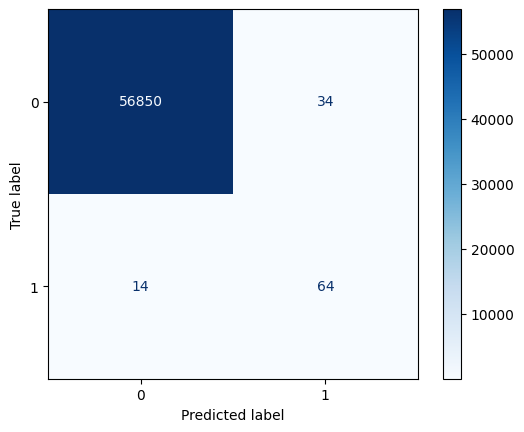

In [607]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=c_matrix)
cm_display.plot(cmap=plt.cm.Blues)
plt.show()

Print ROC(receiver operating characteristics curve)

In [612]:
#predicted probability
Y_test_predicted_proba = model.predict_proba(X_test)[:,1]
roc_auc = metrics.roc_auc_score(Y_test, Y_test_predicted_proba)

In [621]:
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate = False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize = (5,5))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0,1],[0,1], 'k--')
    plt.xlim([0.0, 0.1])
    plt.xlim([0.0, 1.05])
    plt.xlabel('False Positive rate or [1-True Negative Rate]')
    plt.ylabel('True positive rate')
    plt.title('receiver operating characteristics example')
    plt.legend(loc='lower right')
    plt.show()


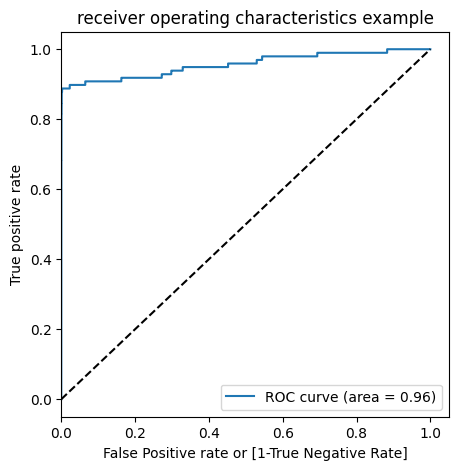

In [622]:
draw_roc(Y_test, Y_test_predicted_proba)